### Holding onto an Atmosphere: Thermal (Jeans) Escape

The basic idea is that gas molecules with high enough temperature can escape from a planet's gravity well. One way to think about it is that an individual molecule's kinetic energy must exceed the change in potential energy in moving the molecule from radius $R$ to an infinite distance away:

\begin{align}
    \mathrm{(Kinetic~Energy)} &> \mathrm{(Change~in~Potential~Energy)} \\
    \\
    \frac{1}{2}mv^2 &> \frac{GMm}{R}
\end{align}

When these two quantities are exactly equal, the molecule has achieved the *escape velocity*,

\begin{equation}
    v_\mathrm{esc} = \sqrt{\frac{2GM}{R}}
\end{equation}

So, any molecule with a velocity $v > v_\mathrm{esc}$ will have enough energy to fly off to infinity.

What determines the velocity of molecules in an atmosphere? Temperature! From statistical mechanics, the velocity distribution of a gas at temperature $T$ is given by the Maxwell-Boltzmann distribution function:

\begin{equation}
    f(v) = \left(\frac{m}{2\pi k T}\right)^{3/2}4\pi v^2 e^{\frac{-mv^2}{2kT}}
\end{equation}

---

Gravitational energy must be overcome by thermal energy:  

\begin{equation}
    \frac{3}{2}kT > \frac{GMm}{R}
\end{equation}

Defining the *escape parameter*,  

\begin{equation}
    \lambda \equiv \frac{3}{2}kT\frac{R}{GMm} = \frac{3kT}{2mgR},
\end{equation}

the criterion is $\lambda < 1$ to retain the constituent with mass $m$ and temperature $T$.

In [1]:
import planets
import planetThermo
import numpy as np
import matplotlib.pyplot as plt
import prettyPlots as pp

pp.setStyle()

In [2]:
Moon = planets.Moon
Mercury = planets.Mercury
Mars = planets.Mars
Earth = planets.Earth
Venus = planets.Venus
Ganymede = planets.Ganymede
Europa = planets.Europa
Titan = planets.Titan

In [3]:
G = planets.G
k = planetThermo.k_B

In [4]:
m_H2O = planetThermo.m_h2o
m_H = planetThermo.mp
m_CO2 = m_H * 44
m_N2 = m_H * 28

In [5]:
m = m_H
E_Moon = m*Moon.g*Moon.R
E_Mercury = m*Mercury.g*Mercury.R
E_Venus = m*Venus.g*Venus.R
E_Earth = m*Earth.g*Earth.R
E_Mars = m*Mars.g*Mars.R
E_Europa = m*Europa.g*Europa.R
E_Ganymede = m*Ganymede.g*Ganymede.R
E_Titan = m*Titan.g*Titan.R
lambda_Moon = E_Moon/(k*Moon.Teq())
lambda_Mercury = E_Mercury/(k*Mercury.Teq())
lambda_Venus = E_Venus/(k*Venus.Teq())
lambda_Earth = E_Earth/(k*Earth.Teq())
lambda_Mars = E_Mars/(k*Mars.Teq())
lambda_Europa = E_Europa/(k*Europa.Teq())
lambda_Ganymede = E_Ganymede/(k*Ganymede.Teq())
lambda_Titan = E_Titan/(k*Titan.Teq())

In [6]:
print('Temperature (K):')
tsurf_data = [Mercury.Teq(), Venus.Teq(), Earth.Teq(), Moon.Teq(), Mars.Teq(), Europa.Teq(), Ganymede.Teq(), Titan.Teq()]
print(tsurf_data)
print('')
print('Pressure (Pa):')
psurf_data = [Mercury.psurf, Venus.psurf, Earth.psurf, Moon.psurf, Mars.psurf, Europa.psurf, Ganymede.psurf, Titan.psurf]
print(psurf_data)
print('')
print('E_esc:')
E_esc = [E_Mercury, E_Venus, E_Earth, E_Moon, E_Mars, E_Europa, E_Ganymede, E_Titan]
print(E_esc)
print('')
print('lambda_esc:')
lambda_esc = [lambda_Mercury, lambda_Venus, lambda_Earth, lambda_Moon, lambda_Mars, lambda_Europa, lambda_Ganymede, lambda_Titan]
print(lambda_esc)
print('')
print('P_esc = e**-lambda:')
P_esc = [np.exp([-lambda_Mercury, -lambda_Venus, -lambda_Earth, -lambda_Moon, -lambda_Mars, -lambda_Europa, -lambda_Ganymede, -lambda_Titan])]
print(P_esc)
print(Titan.Teq())

Temperature (K):
[439.52093646344008, 234.67432668164099, 257.31359650970711, 273.05085165993046, 212.80867931793949, 99.739331362383979, 110.37971470174959, 85.699552448309106]

Pressure (Pa):
[1e-09, 93000.0, 101300.0, 3e-10, 632, 1e-07, 1e-06, 150000.0]

E_esc:
[1.5098376214e-20, 8.97842748316e-20, 1.044088068108e-19, 4.7076798888e-21, 2.103612294e-20, 3.41812536e-21, 6.292873157999999e-21, 5.814375750000001e-21]

lambda_esc:
[2.4880983522058004, 27.710959724122393, 29.389436956159457, 1.2487636746307744, 7.1596737353866819, 2.4822093222056187, 4.1293013588484984, 4.9140707932017174]

P_esc = e**-lambda:
[array([  8.30677821e-02,   9.23173020e-13,   1.72317626e-13,
         2.86859229e-01,   7.77308120e-04,   8.35584141e-02,
         1.60941189e-02,   7.34253746e-03])]
85.6995524483


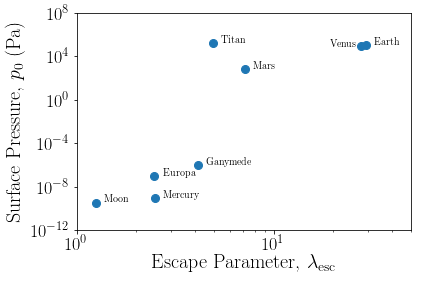

In [7]:
plt.loglog(lambda_esc, psurf_data, 'o')
plt.xlim([1, 50])
plt.ylim([1e-12, 1e8])
plt.xlabel('Escape Parameter, $\lambda_\mathrm{esc}$')
plt.ylabel('Surface Pressure, $p_\mathrm{0}$ (Pa)')
plt.text(lambda_Mercury*1.1, Mercury.psurf*1.1, 'Mercury')
plt.text(lambda_Venus*0.7, Venus.psurf*0.9, 'Venus')
plt.text(lambda_Earth*1.1, Earth.psurf*1.1, 'Earth')
plt.text(lambda_Mars*1.1, Mars.psurf*1.1, 'Mars')
plt.text(lambda_Moon*1.1, Moon.psurf*1.1, 'Moon')
plt.text(lambda_Europa*1.1, Europa.psurf*1.1, 'Europa')
plt.text(lambda_Ganymede*1.1, Ganymede.psurf*1.1, 'Ganymede')
plt.text(lambda_Titan*1.1, Titan.psurf*1.1, 'Titan')
plt.savefig('/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/escape_parameter_data.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
T1 = 300.0
T2 = 500.0
v = np.linspace(0,8e3,100)
f1 = (m_H/(2*np.pi*k*T1))**(3/2) * 4*np.pi*v**2 * np.exp(-m_H*v**2/(2*k*T1))
f2 = (m_H/(2*np.pi*k*T2))**(3/2) * 4*np.pi*v**2 * np.exp(-m_H*v**2/(2*k*T2))

In [ ]:
plt.plot(v, f1/np.sum(f1), label='$T = 300~$K')
plt.plot(v, f2/np.sum(f2), label='$T = 500~$K')
plt.legend(frameon=False)
plt.ylim([0,1.1*np.max(f1/np.sum(f1))])
plt.xlim([0,np.max(v)])
plt.xlabel('Velocity (m s$^{-1}$)')
plt.ylabel('PDF')
#plt.show()
plt.savefig('/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/M-B_Distribution1.pdf',bbox_inches='tight')
plt.show()

In [ ]:
p = [1e-9, 9.2e6, 1e5, 660, 1e-12, 1e-10, 1e-20, 1e-7, 1e-6, 1.5e5 ]
lam = [1.5, 28.9, 31.4, 7.15, 0.91, 2.05, 3.3e-5, 2.53, 3, 5.0]

In [ ]:
plt.loglog(lam, p, 'o')
plt.xlim([0.5,100])
plt.ylim([1e-15,1e10])
plt.xlabel('Escape Parameter, $\lambda_\mathrm{esc}$')
plt.ylabel('Surface Pressure (Pa)')
plt.savefig('/Users/paha3326/main/Teaching/ASTR3720/hayne/notes/pressure-escape.pdf',bbox_inches='tight')
plt.show()

In [9]:
M = np.array([0.055, 0.82, 1.0, 0.11, 318, 95, 14.5, 17.1])
f = np.array([3e-3, 4e-3, 4e-3, 5e-3, 0.2, 0.1, 0.05, 0.05])
Mdisk = M/f
print(Mdisk)

[   18.33333333   205.           250.            22.          1590.           950.
   290.           342.        ]


In [10]:
print(np.sum(Mdisk))

3667.33333333
